In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")
%time

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 6.2 μs


In [3]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.size

750

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


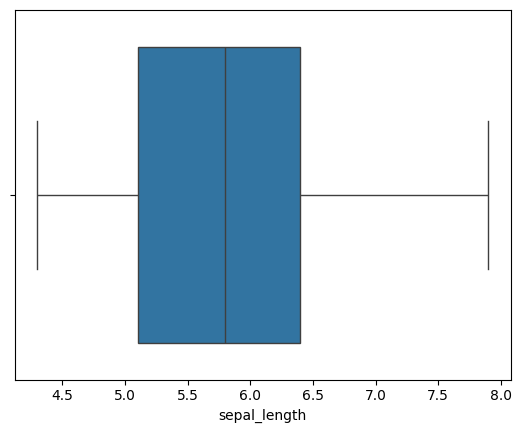

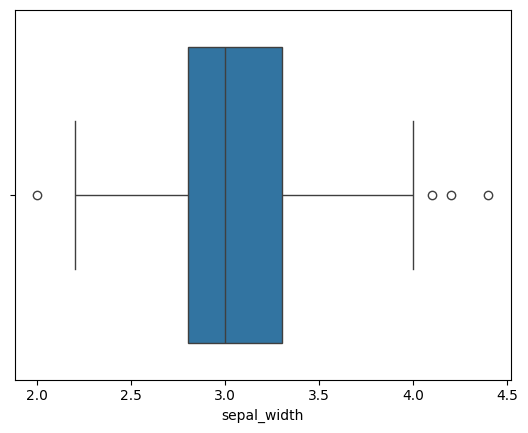

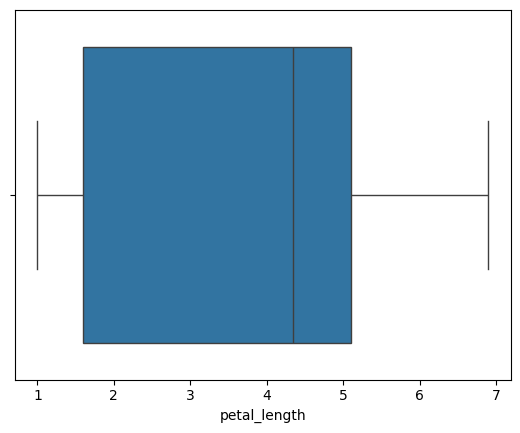

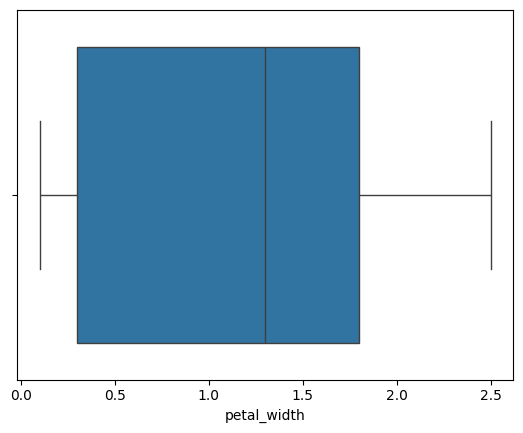

In [12]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [13]:
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['sepal_width'] = df['sepal_width'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(4.05), np.float64(2.05))

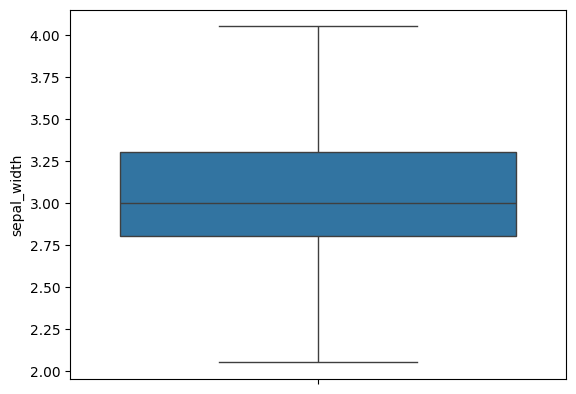

In [14]:
sns.boxplot(df['sepal_width'])
plt.show()

In [15]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
df_sc=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df_sc.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.051961,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.127367,-1.340227,-1.315444,-1.224745
2,-1.385353,0.344364,-1.397064,-1.315444,-1.224745
3,-1.506521,0.108498,-1.283389,-1.315444,-1.224745
4,-1.021849,1.287827,-1.340227,-1.315444,-1.224745


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(5)
model=pca.fit(df_sc)
print("Top 5 EigenValue:",model.explained_variance_)
print("\nTop 5 Eigenvectors:",model.components_)
print("Explaines variable by top 5 Components:",model.explained_variance_ratio_.sum()*100)

Top 5 EigenValue: [3.86266651 0.9195944  0.18816721 0.04236288 0.02076605]

Top 5 Eigenvectors: [[ 0.44495626 -0.23329731  0.50602253  0.49685823  0.49463057]
 [ 0.38070073  0.92142812  0.02910885  0.0714255  -0.00939398]
 [ 0.75173859 -0.2861529   0.02672279 -0.38551304 -0.45129945]
 [ 0.14150274  0.00415266 -0.24645652 -0.61007013  0.73961703]
 [-0.26822928  0.12100353  0.82561429 -0.47668064 -0.06743747]]
Explaines variable by top 5 Components: 99.99999999999997


In [18]:
pca_model=PCA(n_components=0.95)
model_p=pca_model.fit(df_sc)

In [19]:
model_p.n_components_

np.int64(2)

In [20]:
df_pca=pd.DataFrame(model_p.fit_transform(df_sc))
df_pca.head()

,0,1
0,-2.583754,0.504953
1,-2.416448,-0.673971
2,-2.663092,-0.333216
3,-2.604457,-0.593369
4,-2.692695,0.676157


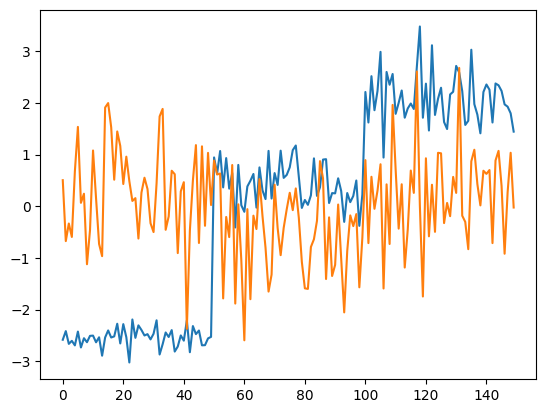

In [21]:
plt.plot(df_pca)

In [22]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,12):
    Kmeans=KMeans(n_clusters=i,random_state=45)
    Kmeans.fit(df_sc)
    wcss.append(Kmeans.inertia_)
wcss

[259.48608772689937,
 161.65946254369223,
 135.67434972233337,
 108.09028419952656,
 97.90230600971404,
 94.90338819334544,
 66.94217169677293,
 58.5421592247816,
 50.082963353589854,
 46.26443112784978]

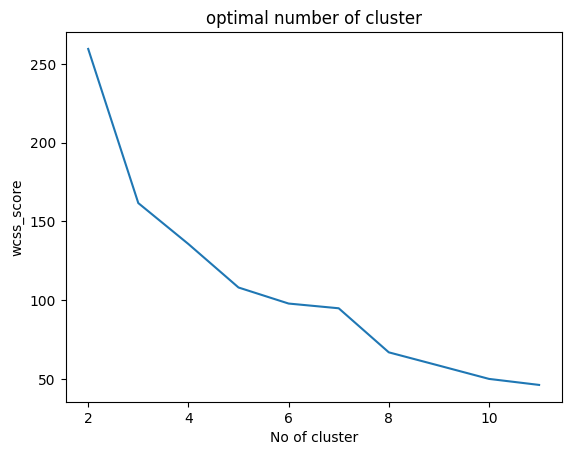

In [23]:
plt.plot(range(2,12),wcss)
plt.xlabel("No of cluster")
plt.ylabel("wcss_score")
plt.title("optimal number of cluster")
plt.tight_layout
plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
Kmeans=KMeans(2)
Kmeans.fit(df_pca)
print(Kmeans.labels_)

df_sc['cluster']=Kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [26]:
df_sc.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

<Axes: xlabel='petal_length', ylabel='sepal_length'>

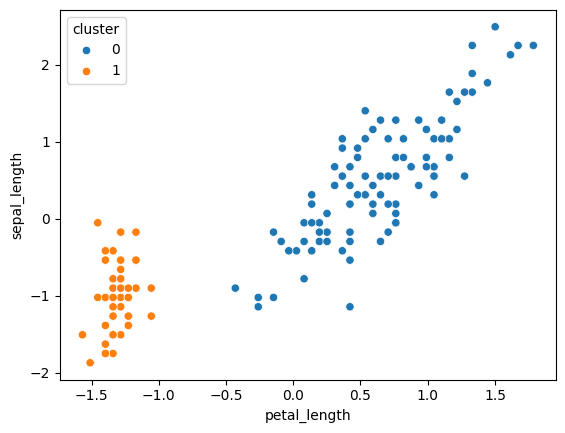

In [27]:
sns.scatterplot(x=df_sc['petal_length'],y=df_sc['sepal_length'],hue=df_sc['cluster'])

<Axes: xlabel='petal_width', ylabel='sepal_width'>

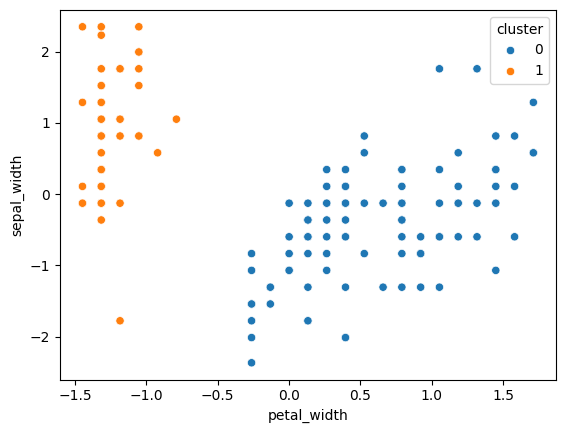

In [28]:
sns.scatterplot(x=df_sc['petal_width'],y=df_sc['sepal_width'],hue=df_sc['cluster'])

In [29]:
from sklearn.model_selection import train_test_split

x=df_sc.drop('cluster',axis=1)
y=df_sc['cluster']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=65)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=45)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=45)

In [31]:
from sklearn.metrics import classification_report
print('Train Data\n--------------')
train_pred=dt.predict(xtrain)
result=classification_report(ytrain,train_pred)
print(result)
print('Test Data\n--------------')
test_pred=dt.predict(xtest)
result=classification_report(ytest,test_pred)
print(result)


Train Data
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Test Data
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



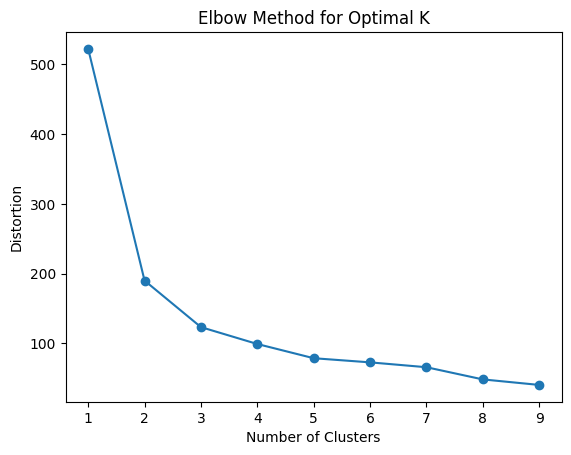

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K_values = range(1, 10)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(xtrain,ytrain)
    distortions.append(kmeans.inertia_)

plt.plot(K_values, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()


In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3)
labels = cluster.fit_predict(xtrain,ytrain)


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(xtrain,ytrain)
reduced_data

array([[ 2.23540599, -0.22185296],
       [ 2.21534835,  0.54816773],
       [ 0.9273024 , -0.6526157 ],
       [-2.64585948,  1.14502164],
       [-2.49799037,  0.5375569 ],
       [ 0.25048408, -1.15585155],
       [ 0.20356341, -0.40823003],
       [-2.30717118, -0.63522397],
       [ 2.59808915,  0.40710411],
       [ 0.14649238, -1.34184369],
       [ 0.74959871,  0.51607056],
       [ 0.58074904, -0.24145355],
       [ 0.25397686, -1.3712744 ],
       [ 1.77038743, -0.53288083],
       [-2.52573359,  0.00798272],
       [ 3.47296341,  0.00565802],
       [-2.53491119,  1.89854655],
       [ 2.57255515,  1.9233759 ],
       [-2.21815535, -2.38331898],
       [ 0.79591564,  0.03223633],
       [ 1.90443663, -0.50354124],
       [ 1.62928098, -0.76083076],
       [ 0.06810911, -0.24254632],
       [ 0.65121573,  0.38863167],
       [-2.88831608, -0.98989678],
       [-2.81883025, -0.49806415],
       [ 0.6490274 ,  0.77795366],
       [-2.68397968, -0.39996056],
       [ 2.08969626,

In [35]:
model_p.n_components_

np.int64(2)

In [36]:
df_pca=pd.DataFrame(model_p.fit_transform(df_sc))
df_pca.head()

,0,1,2
0,-2.670295,0.493898,0.045793
1,-2.499111,-0.673736,0.198805
2,-2.742113,-0.342039,-0.118595
3,-2.683078,-0.599200,-0.139610
4,-2.777752,0.660959,-0.112166


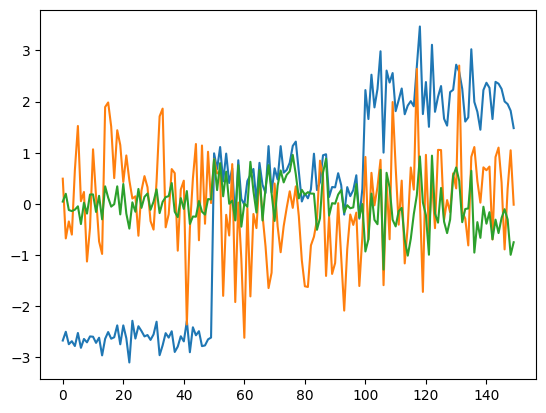

In [37]:
plt.plot(df_pca)

In [38]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,12):
    Kmeans=KMeans(n_clusters=i,random_state=45)
    Kmeans.fit(df_sc)
    wcss.append(Kmeans.inertia_)
wcss
    

[259.4860877268994,
 161.2148090661579,
 135.72300148699765,
 127.7288543505374,
 101.06086746396403,
 95.03300451117651,
 71.28159848973512,
 61.35636021172566,
 58.08120865112817,
 49.860931036280626]

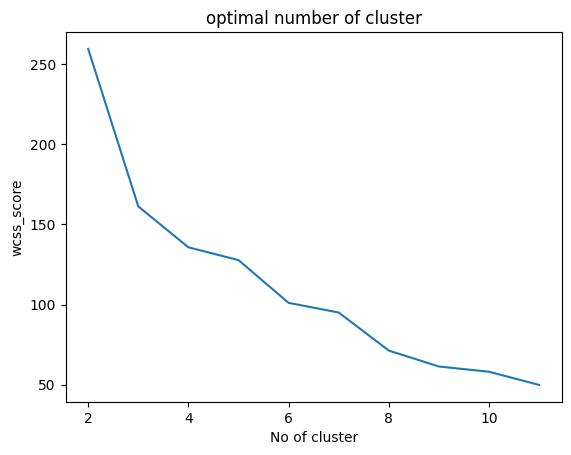

In [39]:
plt.plot(range(2,12),wcss)
plt.xlabel("No of cluster")
plt.ylabel("wcss_score")
plt.title("optimal number of cluster")
plt.tight_layout
plt.show()

In [40]:
Kmeans=KMeans(2)
Kmeans.fit(df_pca)
print(Kmeans.labels_)

df_sc['cluster']=Kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [41]:
df_sc.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

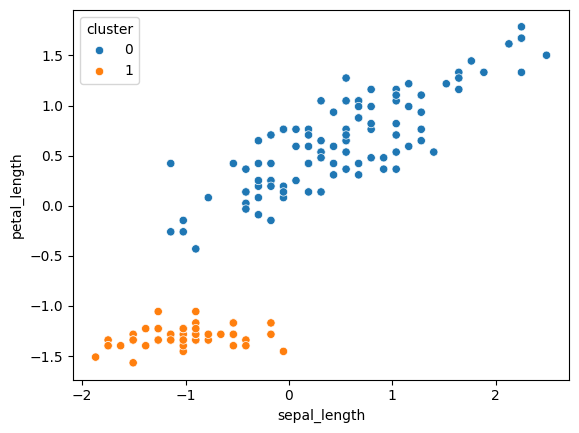

In [43]:
sns.scatterplot(x=df_sc['sepal_length'],y=df_sc['petal_length'],hue=df_sc['cluster'])

In [44]:
from sklearn.model_selection import train_test_split
x=df_sc.drop('cluster',axis=1)
y=df_sc['cluster']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=65)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=45)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=45)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=45)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=45)

In [46]:
from sklearn.metrics import classification_report
print('Train Data\n--------------')
train_pred=dt.predict(xtrain)
result=classification_report(ytrain,train_pred)
print(result)
print('Test Data\n--------------')
test_pred=dt.predict(xtest)
result=classification_report(ytest,test_pred)
print(result)


Train Data
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        34

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Test Data
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

